# Music genre classification 

**Seminar:** Introduction Machine Learning

**Module:** Agents and Interfaces  

**Teacher:** Sarah Haq

**Group members:**

D S 

I N

K H

J H 

Sahadsawat Khamsuk 4000595


# Key Summaries

- This model we have created is the combination of these following **12 features:** ['track_popularity'], ['danceability'], ['energy'], ['loudness'], ['speechiness'], ['acousticness'], ['instrumentalness'], ['liveness'], ['valence'], ['tempo'], ['duration_ms'], and ['playlist_encoded']
- Our model is based on the **XGBoost** algorithm
- The classifier model has relatively impressive scores, **about 0.91 in every metric**
- **['playlist_encoded']** or playlist id is the **strongest** predictive feature
- Other prominent features of the aduio files are **['tempo'], ['speechiness'], ['danceability'],** and **['energy']** respectively
- **['key']** and **['mode']** are the **weakest** predictive features
- **Rap** and **edm** are the genres this model is **best** at predicting
- **Rock** is the genre our model is **worst** at predicting
- To improve the model, we suggest that we **should add new genre-specific features**
- We are **not sure how well the model will perform if it has to handle the larger size of data**

# Outline

This notebook consists of 15 sections in total.

In the first two sections, _Data Cleaning_ and _Feature Engineering_, we have explored the dataset and have prepared the data to be ready for the training and testing processes.

In _A - 01_, this section exhibits our first attempt of developing a model for classifying music genres. However, this first solution is not successful as we have expected, but we were able to identify the cause of the problem.

For section _A - 02_, we have fixed the problem in the previous attempt and have explored the feature importnace of the model.

Beginning from section _A - 03_ to section _A - 09_, we have tried to improve the model by testing the classifier with the cases we have designed. Here are our testing cases:

- Keep 'key'    ;   Keep 'mode' ;   Keep 'liveness'     (already done in Attempt 2)
- Drop 'key'    ;   Drop 'mode' ;   Drop 'liveness'     (Attempt 3)
- Drop 'key'    ;   Drop 'mode' ;   Keep 'liveness'     (Attempt 4)
- Drop 'key'    ;   Keep 'mode' ;   Drop 'liveness'     (Attempt 5)
- Drop 'key'    ;   Keep 'mode' ;   Keep 'liveness'     (Attempt 6)
- Keep 'key'    ;   Drop 'mode' ;   Drop 'liveness'     (Attempt 7)
- Keep 'key'    ;   Drop 'mode' ;   Keep 'liveness'     (Attempt 8)
- Keep 'key'    ;   Keep 'mode' ;   Drop 'liveness'     (Attempt 9)

For _A - 10_ and _A - 11_, we have tested the model with other combinations of features; the combination of features we have designed in the first milestone, and the model with the least number of features, respectively.

In the last two sections, _Results_ and _Acknowledgement_, we have provided the final solution to the given task and have discussed the results obtained, including giving acknowledgment to the sources of information we have employed.

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the dataset into the dataframe

music_data=pd.read_csv("../data/songs_data.csv")

In [3]:
music_data.shape

(32833, 19)

In [4]:
music_data.head()

,track_id,track_name,track_artist,track_popularity,playlist_name,playlist_id,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32833 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32833 non-null  int64  
 4   playlist_name     32833 non-null  object 
 5   playlist_id       32833 non-null  object 
 6   genre             32833 non-null  object 
 7   danceability      32833 non-null  float64
 8   energy            32833 non-null  float64
 9   key               32833 non-null  int64  
 10  loudness          32833 non-null  float64
 11  mode              32833 non-null  int64  
 12  speechiness       32833 non-null  float64
 13  acousticness      32833 non-null  float64
 14  instrumentalness  32833 non-null  float64
 15  liveness          32833 non-null  float64
 16  valence           32833 non-null  float6

In [6]:
# check the music genres

music_data["genre"].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [7]:
# check the proportion of each genre  

music_data["genre"].value_counts(normalize=True)

genre
edm      0.184053
rap      0.175007
pop      0.167728
r&b      0.165413
latin    0.157007
rock     0.150793
Name: proportion, dtype: float64

When we explored the dataset in the previous step, by performing chi-square text, we found out that there are slight differences between the classess of the music genre.

In [8]:
# Check if the categories of genre are significantly different in their frequencies by performing Goodness of Fit Test 

# code generated by ChatGPT using this prompt: "In a column of a dataset, how could I know if categories of that column are significantly different in their frequencies"

from scipy.stats import chisquare

# Calculate observed frequencies
observed_frequencies = music_data["genre"].value_counts().sort_index()

print("Observed Frequencies:")
print(observed_frequencies)

# Number of categories
num_categories = observed_frequencies.size

# Total number of observations
total_observations = observed_frequencies.sum()

# Calculate expected frequencies
expected_frequencies = [total_observations / num_categories] * num_categories

print("\nExpected Frequencies:")
print(expected_frequencies)

# Perform the Chi-Square Goodness of Fit test
chi2_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

print("\nChi2-statistic:", chi2_statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: The categories are significantly different in their frequencies.")
else:
    print("\nFail to reject the null hypothesis: The categories are not significantly different in their frequencies.")

Observed Frequencies:
genre
edm      6043
latin    5155
pop      5507
r&b      5431
rap      5746
rock     4951
Name: count, dtype: int64

Expected Frequencies:
[5472.166666666667, 5472.166666666667, 5472.166666666667, 5472.166666666667, 5472.166666666667, 5472.166666666667]

Chi2-statistic: 141.7999269028112
P-value: 7.413533770067716e-29

Reject the null hypothesis: The categories are significantly different in their frequencies.


Although the proportions of music genres are slightly different, we eventually 1) consider that such differences would not much affect the our machine learning models and 2) assume that the models can handle this issue

In [9]:
# Check for missing data

music_data.isnull().sum()

track_id            0
track_name          5
track_artist        5
track_popularity    0
playlist_name       0
playlist_id         0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [10]:
# Check for duplicated data

music_data.duplicated().sum()

323

In [11]:
# Display the duplicate data

music_data[music_data.duplicated()].sort_values(by='track_id')

,track_id,track_name,track_artist,track_popularity,playlist_name,playlist_id,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
15244,01R0Xdwje645C6xFCnMRvm,Talk Dirty To Me,Poison,54,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",3Ho3iO0iJykgEQNbjB2sic,rock,0.507,0.804,11,-13.267,1,0.0440,0.021100,0.002480,0.3810,0.7080,157.996,223960
31042,037yW9RzsLze4OmBYmcH4G,Save My Night - BlasterJaxx Remix,Armin van Buuren,16,Fitness Workout Electro | House | Dance | Prog...,6KnQDwp0syvhfHOR4lWP7x,edm,0.686,0.906,8,-4.886,1,0.0475,0.001960,0.745000,0.0520,0.1650,129.972,326827
29979,04wllvXvWOkZS5NugzeS8O,Lost,Chris Burke,37,EDM 2020 House & Dance,25ButZrVb1Zj1MJioMs09D,edm,0.616,0.695,9,-7.894,0,0.0397,0.121000,0.022800,0.0311,0.1890,128.008,272124
31097,06qKEP3ITnVPmH2ZW1zYvn,Shotgun - Quintino Remix,Yellow Claw,0,Fitness Workout Electro | House | Dance | Prog...,6KnQDwp0syvhfHOR4lWP7x,edm,0.742,0.930,9,-3.669,1,0.0654,0.002860,0.007790,0.0754,0.3370,127.977,293307
19712,070hrICPvpyzXkbqkRC7Ao,RITMO (Bad Boys For Life) (Remix) *,The Black Eyed Peas,35,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,0.794,0.798,10,-4.791,0,0.0602,0.065100,0.000092,0.2330,0.6290,105.069,228571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15189,7oKLdbEvgGUgqgMyhiptrS,Lost in You Now,Brooke Lanziner,34,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",3Ho3iO0iJykgEQNbjB2sic,rock,0.567,0.582,4,-7.238,1,0.0354,0.086500,0.000003,0.1110,0.5380,84.017,143933
31105,7qBj3Uyq1viGgNVHMwY00D,Go Hard,Quintino,0,Fitness Workout Electro | House | Dance | Prog...,6KnQDwp0syvhfHOR4lWP7x,edm,0.820,0.875,1,-3.711,1,0.0517,0.000657,0.757000,0.0567,0.0605,128.007,275583
19744,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,0.501,0.405,1,-5.679,1,0.0319,0.751000,0.000000,0.1050,0.4460,109.891,182161
31025,7qcoZzfJ7HGOuR6fwTbZND,Faith - Radio Edit,Blasterjaxx,41,Fitness Workout Electro | House | Dance | Prog...,6KnQDwp0syvhfHOR4lWP7x,edm,0.671,0.689,2,-6.613,1,0.0440,0.006390,0.002910,0.2120,0.6410,128.001,183067


There are two columns containing missing values, i.e. 'track_name' and 'track_artist'. However, we consider that these columns are not features of our models, so we will frop them as well as the duplicates.

In [12]:
# Drop 'track_name'

music_data.drop(["track_name"], axis=1, inplace=True)

In [13]:
# Drop 'track_artist'

music_data.drop(["track_artist"], axis=1, inplace=True)

In [14]:
# Drop the duplicates

music_data.drop_duplicates(inplace=True)

# thanks to https://www.w3schools.com/python/pandas/ref_df_drop_duplicates.asp that we have to specify the parameter 'inplace' as true to drop the duplicates in the current dataframe

# Feature Engineering

In [15]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32510 non-null  object 
 1   track_popularity  32510 non-null  int64  
 2   playlist_name     32510 non-null  object 
 3   playlist_id       32510 non-null  object 
 4   genre             32510 non-null  object 
 5   danceability      32510 non-null  float64
 6   energy            32510 non-null  float64
 7   key               32510 non-null  int64  
 8   loudness          32510 non-null  float64
 9   mode              32510 non-null  int64  
 10  speechiness       32510 non-null  float64
 11  acousticness      32510 non-null  float64
 12  instrumentalness  32510 non-null  float64
 13  liveness          32510 non-null  float64
 14  valence           32510 non-null  float64
 15  tempo             32510 non-null  float64
 16  duration_ms       32510 non-null  int64  
dty

To implement our models without any problems, we will transform the object data, i.e. 'track_id', 'playlist_id' and 'genre', to integer data.

In [16]:
# Replace 'track_id' with index numbers

music_data["id_track"] = music_data.index
music_data.drop(["track_id"], axis=1, inplace=True)

In [17]:
music_data.head()

,track_popularity,playlist_name,playlist_id,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,id_track
0,66,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,0
1,67,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1
2,70,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2
3,60,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,3
4,69,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,4


In [18]:
# Display categories of 'playlist_id'

music_data.playlist_id.value_counts()

playlist_id
37i9dQZF1DWTHM4kX49UKs    198
3xMQTDLOIGvj3lWH5e5x6F    189
4JkkvMpVl4lSioqQjeAL0q    153
1qXg9ck25tBRxeXsj8mbDG    100
37i9dQZF1DX68H8ZujdnN7    100
                         ... 
6dqoVI7qwYLyNqbg0MPad3      7
4sr2xEhXQR5VuZ0LZX8TQ8      7
2CJsD3fcYJWcliEKnwmovU      6
6pPpLz42hUkr8gbMirkAEl      3
6HprqD6WZMx5peClrxaprN      1
Name: count, Length: 471, dtype: int64

In [19]:
# Encode integer labels to the classes of 'playlist_id'

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

music_data['playlist_encoded']= label_encoder.fit_transform(music_data['playlist_id'])
music_data.drop(["playlist_id"], axis=1, inplace=True)

In [20]:
music_data['playlist_encoded'].unique()

array([235, 190, 207, 146, 224, 212, 230, 218,   9, 319, 428, 128, 339,
       159, 456, 240, 152, 265, 315, 440, 295,  56, 459,  90,  73,  93,
       431, 402, 400, 419, 327, 131,  61, 101, 294, 435, 399, 273, 108,
       321, 118, 460, 299, 114, 147, 326, 367, 166, 293, 250, 117, 464,
        95, 260, 132, 341, 390, 143,  37,  83, 393, 312, 424, 462, 406,
       382,  57,  87, 323, 412, 405, 380, 298, 452, 328,  62, 111, 376,
       442,  92, 197, 196, 233, 205, 172, 181, 176, 158, 149, 215, 199,
       167, 242, 153, 210, 226, 156, 211, 157, 164, 330,  91,  49, 110,
       384,  14,  18, 291,  59, 277, 271,  31,   0, 308, 353, 258, 392,
        68, 346, 337, 377,  35,  51, 122, 245,  88, 426, 385,  10,  48,
       357,  81,  74,  20, 386, 247,  11,  98, 334,  60, 178, 175, 241,
       180, 162,  23, 217, 179, 201, 184, 151, 195, 234, 461, 174, 370,
       425, 154, 145, 467, 225,  94,  21, 270, 301, 394,  34, 125, 451,
       404,  76, 417,  89,  41, 126, 249, 279, 371, 286, 274, 17

In [21]:
music_data.head()

,track_popularity,playlist_name,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,id_track,playlist_encoded
0,66,Pop Remix,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,0,235
1,67,Pop Remix,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1,235
2,70,Pop Remix,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2,235
3,60,Pop Remix,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,3,235
4,69,Pop Remix,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,4,235


In [22]:
# Encode integer labels to the classes of 'genre'

music_data['genre_encoded']= label_encoder.fit_transform(music_data['genre'])
music_data.drop(["genre"], axis=1, inplace=True)

In [23]:
music_data['genre_encoded'].unique() 

array([2, 4, 5, 1, 3, 0])

In [24]:
music_data.head()

,track_popularity,playlist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,id_track,playlist_encoded,genre_encoded
0,66,Pop Remix,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,0,235,2
1,67,Pop Remix,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1,235,2
2,70,Pop Remix,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2,235,2
3,60,Pop Remix,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,3,235,2
4,69,Pop Remix,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,4,235,2


# A - 01 The Problem

Since we want to show our attempts and working process, we will make a copy of this preliminarily cleaned and encoded dataset. 

In [25]:
# Store the cleaned dataset into another variable using the 'copy' method

music_data_1 = music_data.copy()

# Thanks to https://saturncloud.io/blog/how-to-properly-copy-a-pandas-dataframe-into-another-variable-a-comprehensive-guide/
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
# for giving us the correct way to make a copy of a dataframe

In [26]:
music_data_1.shape

(32510, 17)

## Remove Irrelevant Features

We start by dropping other irrelevant columns that we determined in the first milestone.

In [27]:
music_data_1.drop(["playlist_name"], axis=1, inplace=True)

In [28]:
music_data_1.drop(["key"], axis=1, inplace=True)

In [29]:
music_data_1.drop(["loudness"], axis=1, inplace=True)

In [30]:
music_data_1.drop(["mode"], axis=1, inplace=True)

In [31]:
music_data_1.drop(["instrumentalness"], axis=1, inplace=True)

In [32]:
music_data_1.drop(["duration_ms"], axis=1, inplace=True)

In [33]:
music_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32510 non-null  int64  
 1   danceability      32510 non-null  float64
 2   energy            32510 non-null  float64
 3   speechiness       32510 non-null  float64
 4   acousticness      32510 non-null  float64
 5   liveness          32510 non-null  float64
 6   valence           32510 non-null  float64
 7   tempo             32510 non-null  float64
 8   id_track          32510 non-null  int64  
 9   playlist_encoded  32510 non-null  int32  
 10  genre_encoded     32510 non-null  int32  
dtypes: float64(7), int32(2), int64(2)
memory usage: 2.7 MB


## Define Features and Target

Now, there are no more object type data at this point; only numerical data, which is needed for machine learning model. We can determine our features and target.

In [34]:
# Define the target and features

features = music_data_1.drop(["genre_encoded"], axis=1)
target = music_data_1["genre_encoded"]

In [35]:
features.head()

,track_popularity,danceability,energy,speechiness,acousticness,liveness,valence,tempo,id_track,playlist_encoded
0,66,0.748,0.916,0.0583,0.1020,0.0653,0.518,122.036,0,235
1,67,0.726,0.815,0.0373,0.0724,0.3570,0.693,99.972,1,235
2,70,0.675,0.931,0.0742,0.0794,0.1100,0.613,124.008,2,235
3,60,0.718,0.930,0.1020,0.0287,0.2040,0.277,121.956,3,235
4,69,0.650,0.833,0.0359,0.0803,0.0833,0.725,123.976,4,235


In [36]:
features.shape

(32510, 10)

In [37]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [38]:
target.shape

(32510,)

## Split the Dataset

In [39]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### The Training Set

In [40]:
# size of the training features

X_train.shape

(26008, 10)

In [41]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [42]:
# size of the testing features

X_test.shape

(6502, 10)

In [43]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [44]:
# Import the xgboost algorithm

from xgboost import XGBClassifier

clf_xgb = XGBClassifier()

In [45]:
# Train the model: fit the model to the training set

clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [46]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 3, 0, ..., 0, 2, 3], dtype=int64)

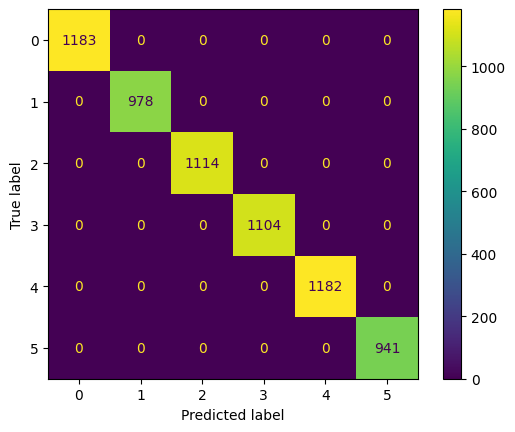

In [47]:
# Plot the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

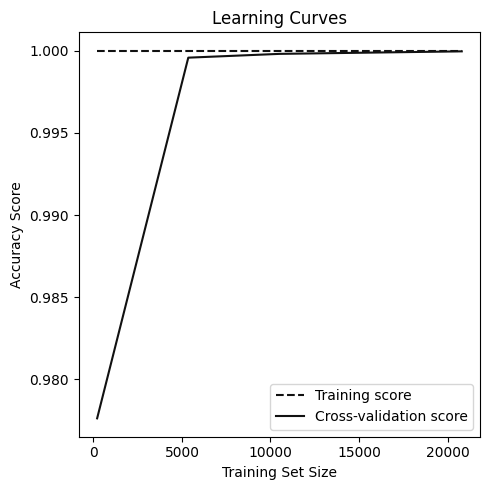

In [48]:
# Plot the learning curve

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.learning_curve_plot import learning_curve_plot

learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

# We thank Sarah Huq for this function

Evaluation: 

According to the confusion matrix and the learning curve, the model seems to be very accurate at the first glance. The diagonal in the confusion matrix has the highest numbers, while every other square is labeled with a zero. However, we think that it is very abnormal since this algorithm makes no mistakes at all, which is very uncommon in machine learning. While it is the goal to have an accuracy as high as possible, reaching a perfect accuracy on the first try without any tweaking of the model made our alarm bells ring. **Considering the learning curve, we have a hunch that our model is overfitting, just remembering the pattern instead of learning from it.**

### Random Forest

Because our first algorithm made us quite suspicious, we decided to try a different algorithm and then compare the results. For this experiment we chose to use the random forest algorithm.

In [49]:
# Import the random forest algorithm

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

In [50]:
# Train the model: fit the model to the training set

clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([4, 3, 0, ..., 0, 2, 3])

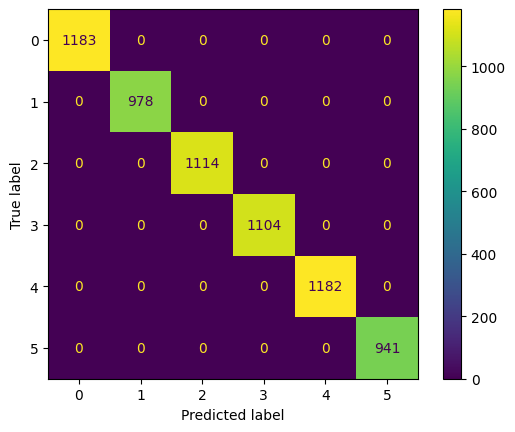

In [52]:
# plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

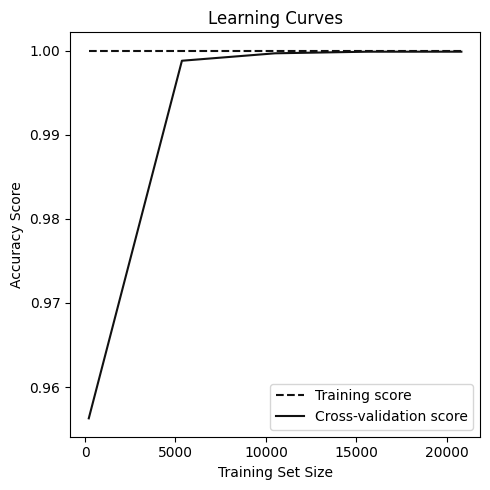

In [53]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

The results of both the confusion matrix, as well as the Learning curve are very similar to the case above, **this model is also overfitting** which leads us to the conclusion, that the problem is likely in our dataset. Because of that we decided to have another look at the features in our dataset.

## Investigate the Problem

To investigate why both the models are overfitting, we plot the feature importance.

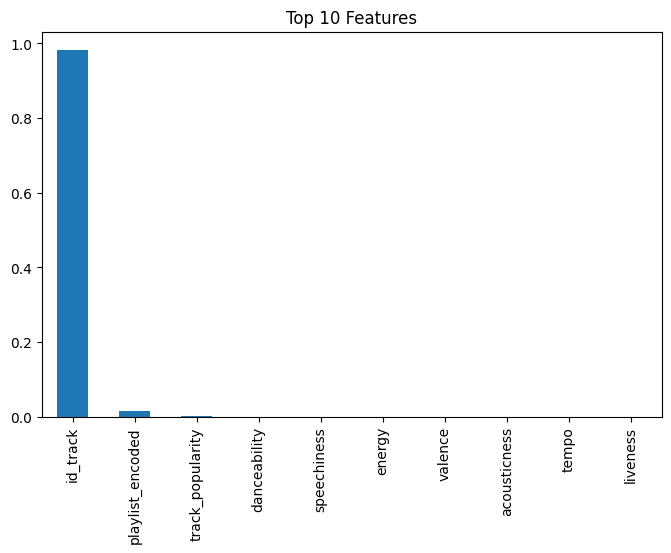

In [54]:
# Plot the feature importance

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.feature_importance_plot import feature_importance_plot

# For the XGBoost model

feature_importance_plot(clf_xgb, X_train, n = 10)

# We also thank Sarah Haq for this function

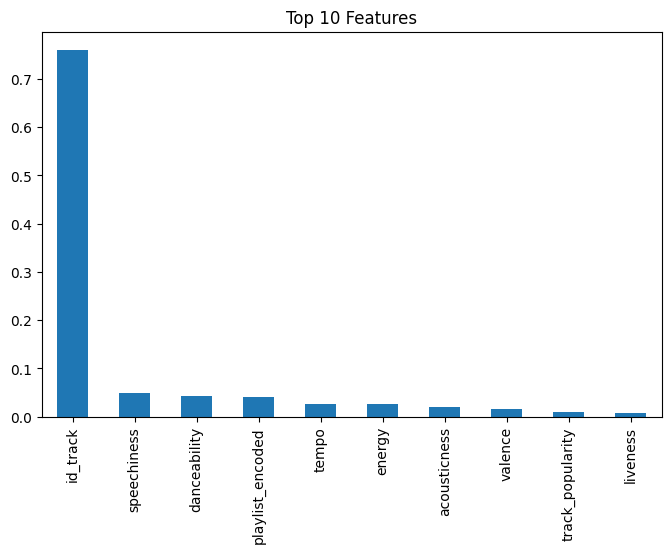

In [55]:
# For the random forest model

feature_importance_plot(clf_rf, X_train, n = 10)

From both charts, we can see that 'id_track' is the strongest predictive feature. However, it casues our models to be extremely biased. **This might be because our models entirely base themselves only or mostly on the index numbers.** As a result, our models overfit the training data. **To improve our models, this feature will be removed in order to reduce model flexibility.**

# A - 02 Explore Possible Combinations of Features

For this attempt (shortened as "A"), we will drop 'id_track' feature because of the aforementioned reason and explore the importance of other possible features.

We have the suspicion that the id_track column might be the reason the model is remembering instead of learning.

In [56]:
# Store the cleaned dataset into another variable

music_data_2 = music_data.copy()

In [57]:
music_data_2.shape

(32510, 17)

## Remove Irrelevant Features

In [58]:
# Drop the problematic feature: 'id_track'

music_data_2.drop(["id_track"], axis=1, inplace=True)

In [59]:
# Also drop another object type feature: 'playlist_name'

music_data_2.drop(["playlist_name"], axis=1, inplace=True)

In [60]:
music_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32510 non-null  int64  
 1   danceability      32510 non-null  float64
 2   energy            32510 non-null  float64
 3   key               32510 non-null  int64  
 4   loudness          32510 non-null  float64
 5   mode              32510 non-null  int64  
 6   speechiness       32510 non-null  float64
 7   acousticness      32510 non-null  float64
 8   instrumentalness  32510 non-null  float64
 9   liveness          32510 non-null  float64
 10  valence           32510 non-null  float64
 11  tempo             32510 non-null  float64
 12  duration_ms       32510 non-null  int64  
 13  playlist_encoded  32510 non-null  int32  
 14  genre_encoded     32510 non-null  int32  
dtypes: float64(9), int32(2), int64(4)
memory usage: 3.7 MB


## Define Features and Target

In [61]:
# Define the target and features

features = music_data_2.drop(["genre_encoded"], axis=1)
target = music_data_2["genre_encoded"]

In [62]:
features.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_encoded
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,235
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,235
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,235
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,235
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,235


In [63]:
features.shape

(32510, 14)

In [64]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [65]:
target.shape

(32510,)

## Split the Dataset

In [66]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)


### The Training Set

In [67]:
# size of the training features

X_train.shape

(26008, 14)

In [68]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [69]:
# size of the testing features

X_test.shape

(6502, 14)

In [70]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [71]:
# Train the model: fit the model to the training set

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [72]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 3, 0, ..., 0, 2, 3], dtype=int64)

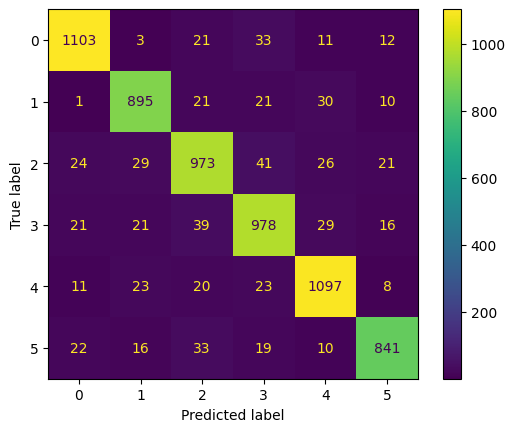

In [73]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

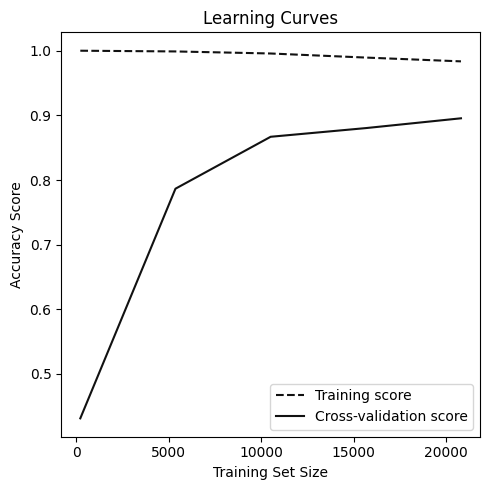

In [74]:
# Plot the learning curve

learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

Evaluation: 

The confusion matrix looks much more realistic this time. While the diagonal still contains most of the values, the accuracy is not 100% and small numbers are scattered across the rest of the squares. This leads to the conclusion, that the model might be actually learning and not just remembering now, which would mean that the id_track feature was causing the issue. Looking at the learning curve, we can see that the training score starts at an accuracy score of 1 and only declines very slightly. The cross-validation score starts at zero, then increases rapidly until the training set size of 5000, when it reaches an accuracy score of around 0.75. After that, the Cross-validation score increses some more before leveling out at around 0.9 on the accurcy score. When comparing this to the first model, where the training score was the same but the cross-validation score incresed rapidly until an accuracy score of 1 and then stayed there, we can see that taking out the id_track feature made a huge difference.

### Random Forest

Since we used a second algorithm for out first try, we also wanted to try the random forest classifier on our altered dataset.

In [75]:
# Train the model: fit the model to the training set

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([0, 2, 0, ..., 0, 3, 0])

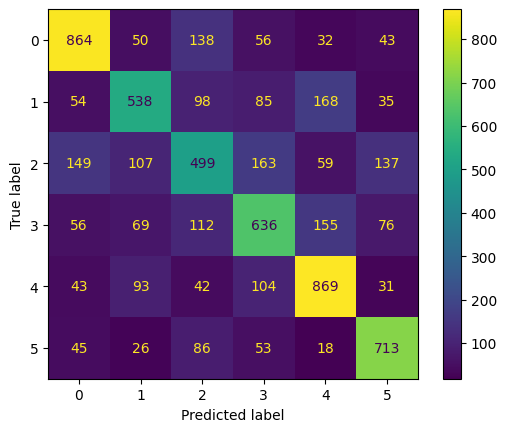

In [77]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

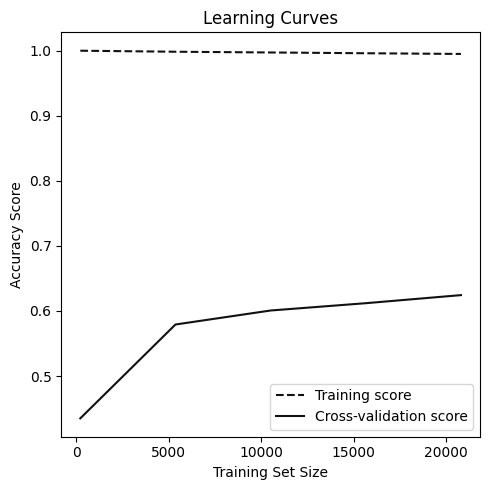

In [78]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

Evaluation:

The Cofusion matrix looks similar to the one produced by the XGBoost Classifier. The Learning Curve is also significantly different from the one produced by using our original dataset. When comparing it to the The Learning Curve produced by the XGBoost Classifier, the training score of both look very similar. The cross-validation score also has a similar form but only reaches an accuracy score of around 0.65 for the Random Forest Classifier. This leads to the conclusion that the SGBoost Classifier might be more suitable for solving our problem - or at least might be the one learning better from out current dataset. 

## Evaluate the Models

According to the confusion matrices and learning curves of both algorithms, our models make more sense now since there are some errors, indicating that the models do not entirely memorize the patterns. At the beginning of the learning curves, where the number of the dataset is small, the training accuracy scores start highly as or close to 1, seeming like the models overfit the training data. However, when the the dataset size gets larger, the training scores start to noticeably decrease, indicating that the classifiers begins to generalize better. Thanks to this information, **we become more confident that our models actually learn from the data.**

We greatly benefit from the discussions in these forums and want thank them for their insights:
https://stackoverflow.com/questions/36981050/learning-curves-why-does-the-training-accuracy-start-so-high-then-suddenly-dr 
and https://stats.stackexchange.com/questions/210407/learning-curves-why-does-the-training-accuracy-start-so-high-then-suddenly-dr
We looked to these comments since we wondered and wanted to answer why our training accuracy score start at 1, unlike the learning curves resulted from the spam classification. We assume that it might be due to the imbalanced data (between spam and not spam data) and that our predicted labels for the music genres contain multiple classess while the category of the spam data is binary.    

In [79]:
# Import Score Calculators

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Display the scores

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_rf), 6),
                           round(accuracy_score(y_test, y_pred_xgb), 6)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_rf, average="macro"), 6),
                        round(recall_score(y_test, y_pred_xgb, average="macro"), 6)],
              "Precision": [ 
                           round(precision_score(y_test, y_pred_rf, average="macro"), 6),
                           round(precision_score(y_test, y_pred_xgb, average="macro"), 6)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_rf, average="macro"), 6),
                           round(f1_score(y_test, y_pred_xgb, average="macro"), 6)],
             })

# We thank https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
# and https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html
# for reminding that we have to specify parameter 'average' as 'macro' (calculating the score globally)
# since we have results with multiple classess

,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.633497,0.632895,0.628523,0.629545
1,XGBoost,0.905414,0.904771,0.905689,0.905161


According to the learning curves and the evaluation metrics, **the XGBoost model performs better than the random forest model**. This confirms our earlier evaluation of the learning curves. Furthermore, all evaluation metrics of the XGBoost Classifier are over 0.9, which already looks like good scores. It might still be possible to improve those values, but the scores are already a good starting point and mean we are on the right track. All Random Forest Classifier metrics are around 0.62 - 0.63.

## Inspect the Feature Importance

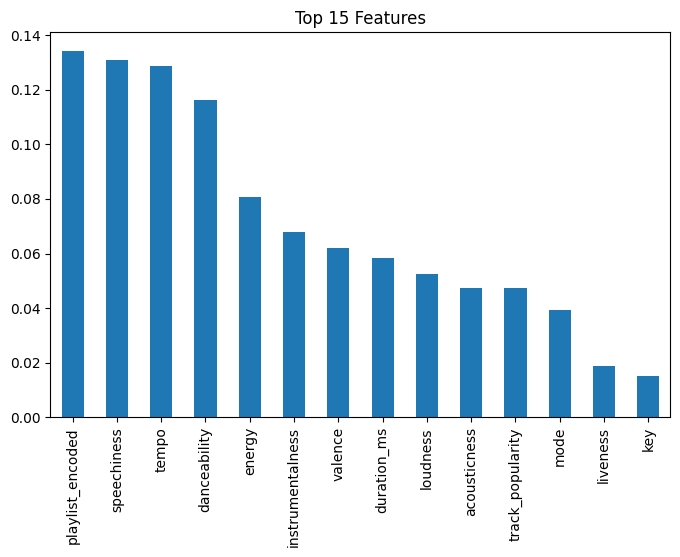

In [80]:
# Plot the feature importance for the XGBoost model, after having taken out the id_track

feature_importance_plot(clf_xgb, X_train, n = 15)

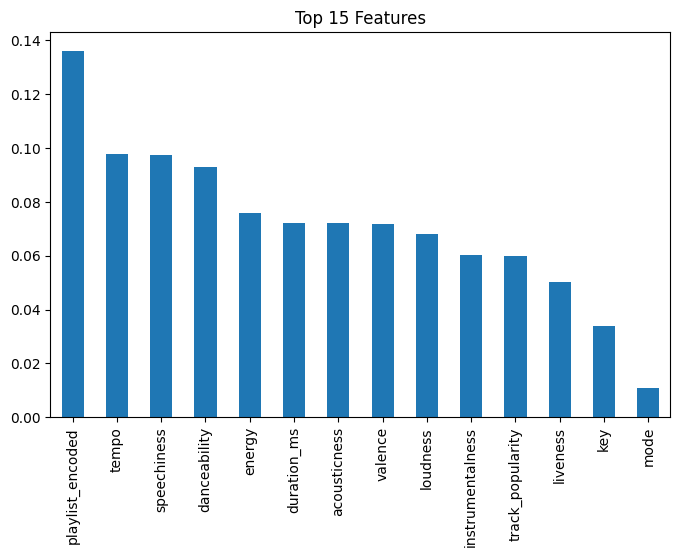

In [81]:
# Plot the feature importance for the random forest model


feature_importance_plot(clf_rf, X_train, n = 15)

Now that we remove 'id_track', our models make more sense and yield satisfying outcomes. From these charts, **'playlist_encoded' or playlist id is the strongest predictor.** Other prominent features like 'tempo', 'speechiness', and 'danceability' are also strong predictors and share similar porportion of strength.

## Note 

After adjusting the data for our second attempt for the model and spending some time evaluating all our results and comparing the different metrics and the two Classifiers XGBoost and Random Foret, we are quite satisfied with the results the XGBoost Classifier is producing with our altered dataset. The following investigations are done out of interest for wether we might be able to produce even better scores. After the exploration and experiment, a final results chapter provides final evaluations on the whole process.



# A - 03 Drop the Three Weakest Features

While our second attempt is satisfying, we would like to explore and experiment more.

In our pilot work, we accidentally have removed features 'key' and 'mode' and have found that the XGBoost model yields the score of 0.91 in every metric while the model yields about 0.90 for other combinations of removed features. We would like to know how the model will perform if some features are removed. Therefore, beginning from this trial, we will repeat the same process but will try creating different combinations of features.

In [82]:
# Store the cleaned dataset into another variable

music_data_3 = music_data.copy()

In [83]:
music_data_3.shape

(32510, 17)

## Remove Irrelevant Features

In [84]:
# Drop the problematic feature: 'id_track'

music_data_3.drop(["id_track"], axis=1, inplace=True)

In [85]:
# Also drop another object type feature: 'playlist_name'

music_data_3.drop(["playlist_name"], axis=1, inplace=True)

According to the feature importance charts in the 2nd attempt, we will drop the three weakest features.

In [86]:
music_data_3.drop(["key"], axis=1, inplace=True)

In [87]:
music_data_3.drop(["liveness"], axis=1, inplace=True)

In [88]:
music_data_3.drop(["mode"], axis=1, inplace=True)

In [89]:
music_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32510 non-null  int64  
 1   danceability      32510 non-null  float64
 2   energy            32510 non-null  float64
 3   loudness          32510 non-null  float64
 4   speechiness       32510 non-null  float64
 5   acousticness      32510 non-null  float64
 6   instrumentalness  32510 non-null  float64
 7   valence           32510 non-null  float64
 8   tempo             32510 non-null  float64
 9   duration_ms       32510 non-null  int64  
 10  playlist_encoded  32510 non-null  int32  
 11  genre_encoded     32510 non-null  int32  
dtypes: float64(8), int32(2), int64(2)
memory usage: 3.0 MB


## Define Features and Target

In [90]:
# Define the target and features

features = music_data_3.drop(["genre_encoded"], axis=1)
target = music_data_3["genre_encoded"]

In [91]:
features.head()

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,playlist_encoded
0,66,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.518,122.036,194754,235
1,67,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.693,99.972,162600,235
2,70,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.613,124.008,176616,235
3,60,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.277,121.956,169093,235
4,69,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.725,123.976,189052,235


In [92]:
features.shape

(32510, 11)

In [93]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [94]:
target.shape

(32510,)

## Split the Dataset

In [95]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)


### The Training Set

In [96]:
# size of the training features

X_train.shape

(26008, 11)

In [97]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [98]:
# size of the testing features

X_test.shape

(6502, 11)

In [99]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [100]:
# Train the model: fit the model to the training set

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [101]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 2, 0, ..., 0, 2, 3], dtype=int64)

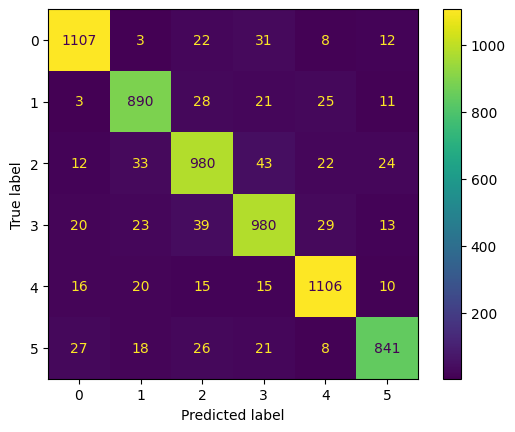

In [102]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

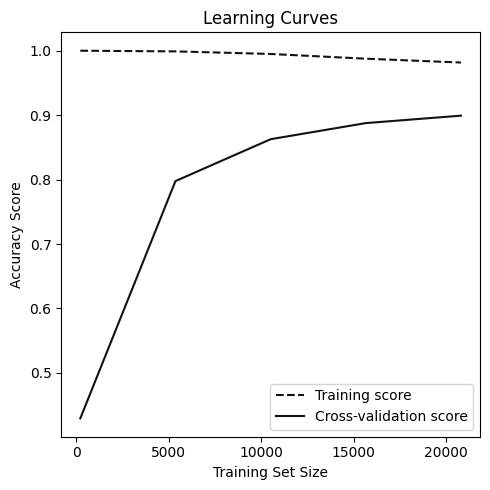

In [103]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

### Random Forest

In [104]:
# Train the model: fit the model to the training set

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([0, 2, 0, ..., 0, 3, 0])

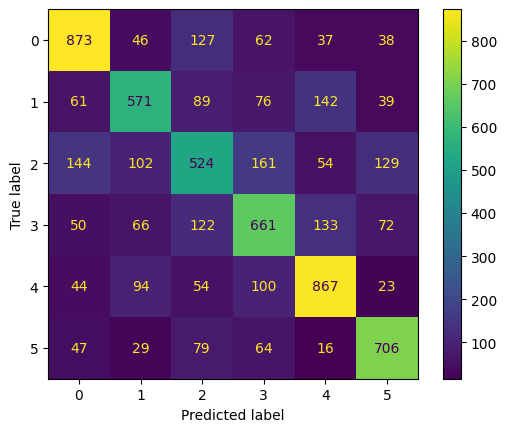

In [106]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

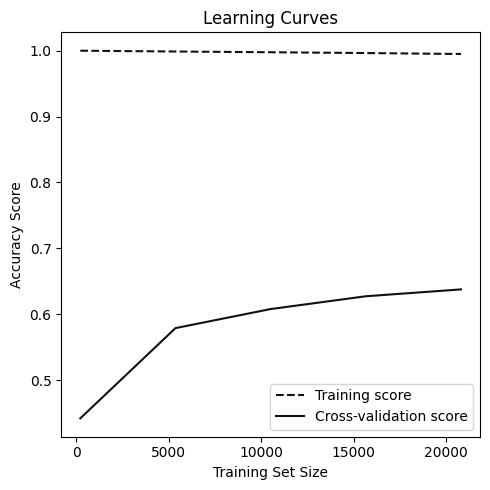

In [107]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

## Evaluate the Models

In [108]:
# Display the scores

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_rf), 6),
                           round(accuracy_score(y_test, y_pred_xgb), 6)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_rf, average="macro"), 6),
                        round(recall_score(y_test, y_pred_xgb, average="macro"), 6)],
              "Precision": [ 
                           round(precision_score(y_test, y_pred_rf, average="macro"), 6),
                           round(precision_score(y_test, y_pred_xgb, average="macro"), 6)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_rf, average="macro"), 6),
                           round(f1_score(y_test, y_pred_xgb, average="macro"), 6)],
             })

,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.646263,0.645779,0.642496,0.643469
1,XGBoost,0.908028,0.907101,0.907873,0.907435


# A - 04 Drop 'key' ; Drop 'mode' ; Keep 'liveness' , the Most Successful

We would like to see how the models will perform if 'key' and 'mode' are dropped.

In [109]:
# Store the cleaned dataset into another variable

music_data_4 = music_data.copy()

In [110]:
music_data_4.shape

(32510, 17)

## Remove Irrelevant Features

In [111]:
# Drop the problematic feature: 'id_track'

music_data_4.drop(["id_track"], axis=1, inplace=True)

In [112]:
# Also drop another object type feature: 'playlist_name'

music_data_4.drop(["playlist_name"], axis=1, inplace=True)

Now 'key' and 'mode' will be dropped.

In [113]:
music_data_4.drop(["key"], axis=1, inplace=True)

In [114]:
music_data_4.drop(["mode"], axis=1, inplace=True)

In [115]:
music_data_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32510 non-null  int64  
 1   danceability      32510 non-null  float64
 2   energy            32510 non-null  float64
 3   loudness          32510 non-null  float64
 4   speechiness       32510 non-null  float64
 5   acousticness      32510 non-null  float64
 6   instrumentalness  32510 non-null  float64
 7   liveness          32510 non-null  float64
 8   valence           32510 non-null  float64
 9   tempo             32510 non-null  float64
 10  duration_ms       32510 non-null  int64  
 11  playlist_encoded  32510 non-null  int32  
 12  genre_encoded     32510 non-null  int32  
dtypes: float64(9), int32(2), int64(2)
memory usage: 3.2 MB


## Define Features and Target

In [116]:
# Define the target and features

features = music_data_4.drop(["genre_encoded"], axis=1)
target = music_data_4["genre_encoded"]

In [117]:
features.head()

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_encoded
0,66,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,235
1,67,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,235
2,70,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,235
3,60,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,235
4,69,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,235


In [118]:
features.shape

(32510, 12)

In [119]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [120]:
target.shape

(32510,)

## Split the Dataset

In [121]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)


### The Training Set

In [122]:
# size of the training features

X_train.shape

(26008, 12)

In [123]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [124]:
# size of the testing features

X_test.shape

(6502, 12)

In [125]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [126]:
# Train the model: fit the model to the training set

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [127]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 3, 0, ..., 0, 2, 0], dtype=int64)

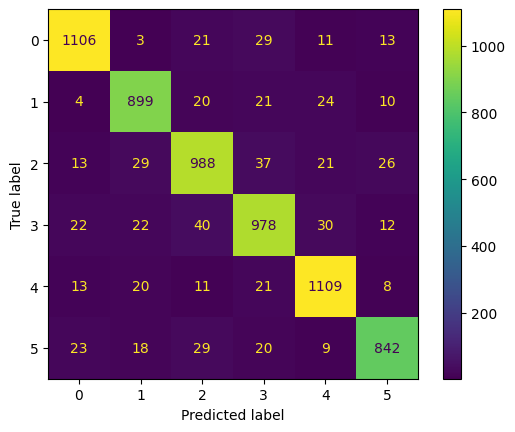

In [128]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

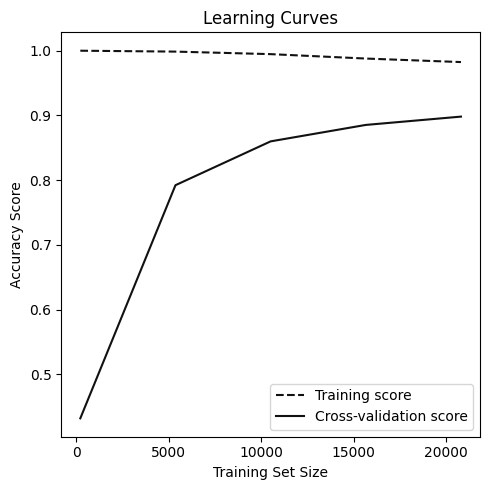

In [129]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

### Random Forest

In [130]:
# Train the model: fit the model to the training set

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([4, 2, 0, ..., 0, 2, 0])

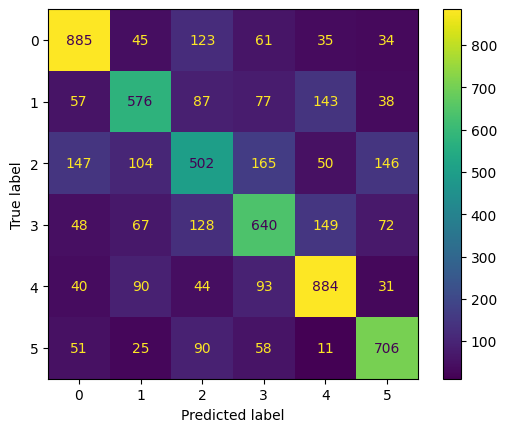

In [132]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

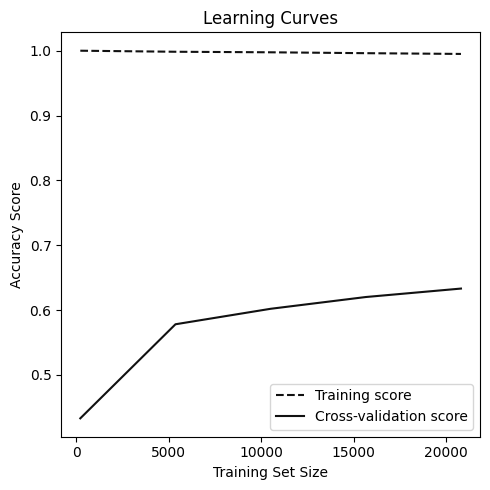

In [133]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

## Evaluate the Models

In [134]:
# Display the scores

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_rf), 6),
                           round(accuracy_score(y_test, y_pred_xgb), 6)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_rf, average="macro"), 6),
                        round(recall_score(y_test, y_pred_xgb, average="macro"), 6)],
              "Precision": [ 
                           round(precision_score(y_test, y_pred_rf, average="macro"), 6),
                           round(precision_score(y_test, y_pred_xgb, average="macro"), 6)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_rf, average="macro"), 6),
                           round(f1_score(y_test, y_pred_xgb, average="macro"), 6)],
             })

,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.644878,0.644257,0.639760,0.641067
1,XGBoost,0.910797,0.909988,0.910696,0.910282


After considering and comparing this evaluation metrics to the metrics of the other attempts, while the differences between their scores are relatively small, it could be indicated **the model of our fourth attempt performs slightly better** (the feature 'liveness' is not removed).

## Inspect the Feature Importance

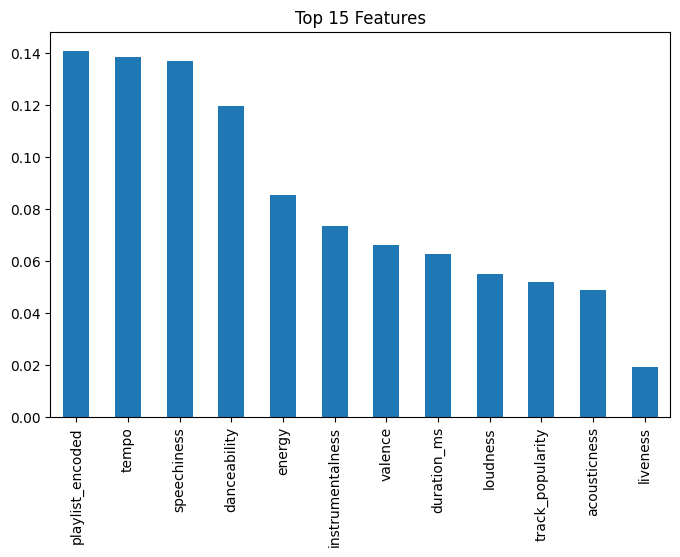

In [135]:
# Plot the feature importance for the XGBoost model

feature_importance_plot(clf_xgb, X_train, n = 15)

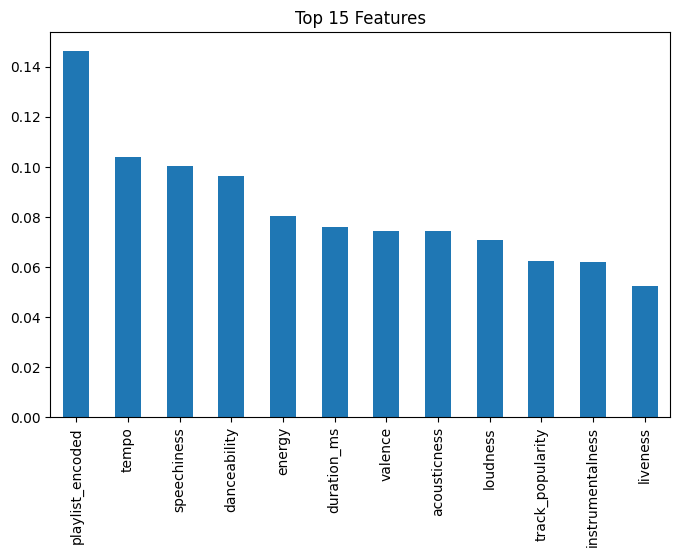

In [136]:
# Plot the feature importance for the random forest model


feature_importance_plot(clf_rf, X_train, n = 15)

# A - 05 Drop 'key' ; Keep 'mode' ; Drop 'liveness'

We would like to see how the models will perform if 'key' and 'liveness' are dropped.

In [137]:
# Store the cleaned dataset into another variable

music_data_5 = music_data.copy()

In [138]:
music_data_5.shape

(32510, 17)

## Remove Irrelevant Features

In [139]:
# Drop the problematic feature: 'id_track'

music_data_5.drop(["id_track"], axis=1, inplace=True)

In [140]:
# Also drop another object type feature: 'playlist_name'

music_data_5.drop(["playlist_name"], axis=1, inplace=True)

Now 'key' and 'liveness' will be dropped.

In [141]:
music_data_5.drop(["key"], axis=1, inplace=True)

In [142]:
music_data_5.drop(["liveness"], axis=1, inplace=True)

In [143]:
music_data_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32510 non-null  int64  
 1   danceability      32510 non-null  float64
 2   energy            32510 non-null  float64
 3   loudness          32510 non-null  float64
 4   mode              32510 non-null  int64  
 5   speechiness       32510 non-null  float64
 6   acousticness      32510 non-null  float64
 7   instrumentalness  32510 non-null  float64
 8   valence           32510 non-null  float64
 9   tempo             32510 non-null  float64
 10  duration_ms       32510 non-null  int64  
 11  playlist_encoded  32510 non-null  int32  
 12  genre_encoded     32510 non-null  int32  
dtypes: float64(8), int32(2), int64(3)
memory usage: 3.2 MB


## Define Features and Target

In [144]:
# Define the target and features

features = music_data_5.drop(["genre_encoded"], axis=1)
target = music_data_5["genre_encoded"]

In [145]:
features.head()

,track_popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,playlist_encoded
0,66,0.748,0.916,-2.634,1,0.0583,0.1020,0.000000,0.518,122.036,194754,235
1,67,0.726,0.815,-4.969,1,0.0373,0.0724,0.004210,0.693,99.972,162600,235
2,70,0.675,0.931,-3.432,0,0.0742,0.0794,0.000023,0.613,124.008,176616,235
3,60,0.718,0.930,-3.778,1,0.1020,0.0287,0.000009,0.277,121.956,169093,235
4,69,0.650,0.833,-4.672,1,0.0359,0.0803,0.000000,0.725,123.976,189052,235


In [146]:
features.shape

(32510, 12)

In [147]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [148]:
target.shape

(32510,)

## Split the Dataset

In [149]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)


### The Training Set

In [150]:
# size of the training features

X_train.shape

(26008, 12)

In [151]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [152]:
# size of the testing features

X_test.shape

(6502, 12)

In [153]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [154]:
# Train the model: fit the model to the training set

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [155]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 2, 0, ..., 0, 2, 0], dtype=int64)

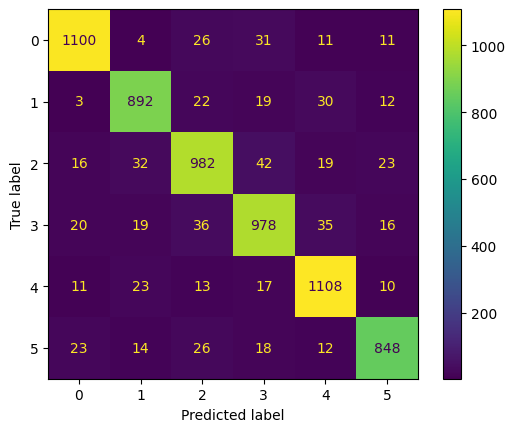

In [156]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

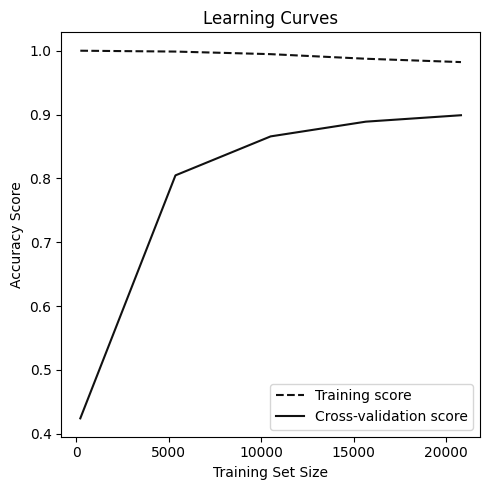

In [157]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

### Random Forest

In [158]:
# Train the model: fit the model to the training set

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [159]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([4, 2, 0, ..., 0, 2, 0])

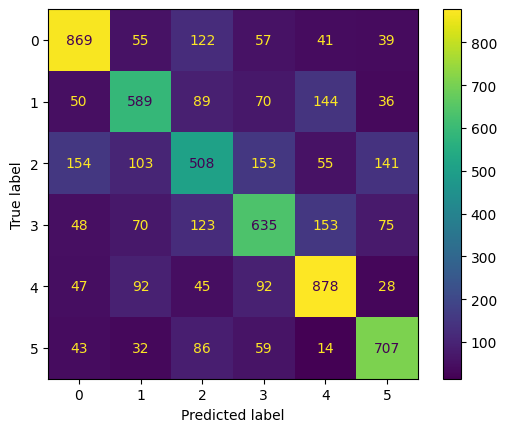

In [160]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

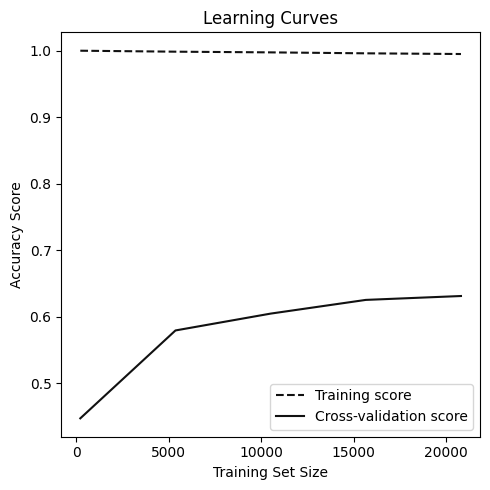

In [161]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

## Evaluate the Models

In [162]:
# Display the scores

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_rf), 6),
                           round(accuracy_score(y_test, y_pred_xgb), 6)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_rf, average="macro"), 6),
                        round(recall_score(y_test, y_pred_xgb, average="macro"), 6)],
              "Precision": [ 
                           round(precision_score(y_test, y_pred_rf, average="macro"), 6),
                           round(precision_score(y_test, y_pred_xgb, average="macro"), 6)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_rf, average="macro"), 6),
                           round(f1_score(y_test, y_pred_xgb, average="macro"), 6)],
             })

,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.643802,0.643693,0.638942,0.640429
1,XGBoost,0.908643,0.907974,0.908617,0.908240


# A - 06 Drop 'key' ; Keep 'mode' ; Keep 'liveness'

We would like to see how the models will perform if only 'key' is dropped.

In [163]:
# Store the cleaned dataset into another variable

music_data_6 = music_data.copy()

In [164]:
music_data_6.shape

(32510, 17)

## Remove Irrelevant Features

In [165]:
# Drop the problematic feature: 'id_track'

music_data_6.drop(["id_track"], axis=1, inplace=True)

In [166]:
# Also drop another object type feature: 'playlist_name'

music_data_6.drop(["playlist_name"], axis=1, inplace=True)

Now only 'key' will be dropped.

In [167]:
music_data_6.drop(["key"], axis=1, inplace=True)

In [168]:
music_data_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32510 non-null  int64  
 1   danceability      32510 non-null  float64
 2   energy            32510 non-null  float64
 3   loudness          32510 non-null  float64
 4   mode              32510 non-null  int64  
 5   speechiness       32510 non-null  float64
 6   acousticness      32510 non-null  float64
 7   instrumentalness  32510 non-null  float64
 8   liveness          32510 non-null  float64
 9   valence           32510 non-null  float64
 10  tempo             32510 non-null  float64
 11  duration_ms       32510 non-null  int64  
 12  playlist_encoded  32510 non-null  int32  
 13  genre_encoded     32510 non-null  int32  
dtypes: float64(9), int32(2), int64(3)
memory usage: 3.5 MB


## Define Features and Target

In [169]:
# Define the target and features

features = music_data_6.drop(["genre_encoded"], axis=1)
target = music_data_6["genre_encoded"]

In [170]:
features.head()

,track_popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_encoded
0,66,0.748,0.916,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,235
1,67,0.726,0.815,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,235
2,70,0.675,0.931,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,235
3,60,0.718,0.930,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,235
4,69,0.650,0.833,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,235


In [171]:
features.shape

(32510, 13)

In [172]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [173]:
target.shape

(32510,)

## Split the Dataset

In [174]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)


### The Training Set

In [175]:
# size of the training features

X_train.shape

(26008, 13)

In [176]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [177]:
# size of the testing features

X_test.shape

(6502, 13)

In [178]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [179]:
# Train the model: fit the model to the training set

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [180]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 2, 0, ..., 0, 2, 3], dtype=int64)

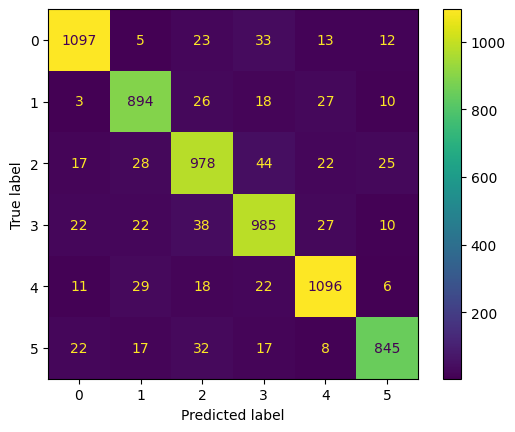

In [181]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

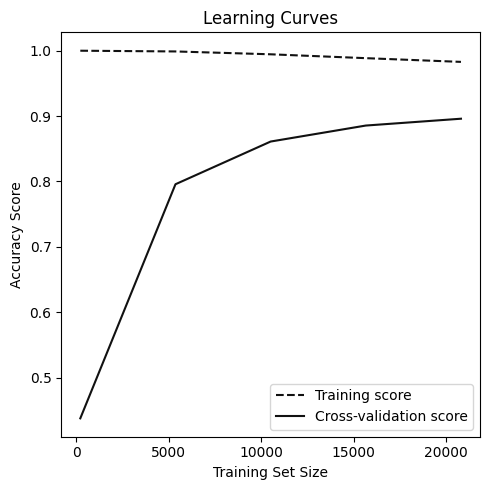

In [182]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

### Random Forest

In [183]:
# Train the model: fit the model to the training set

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [184]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([4, 2, 0, ..., 0, 2, 0])

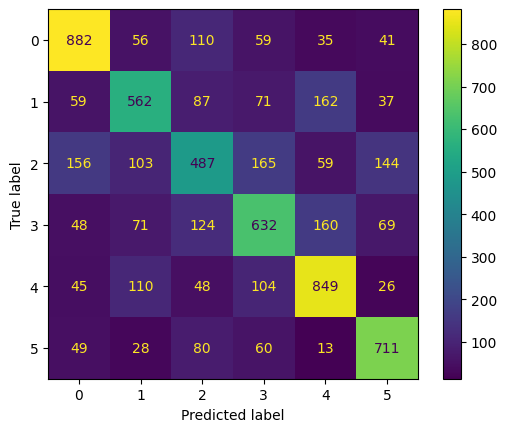

In [185]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

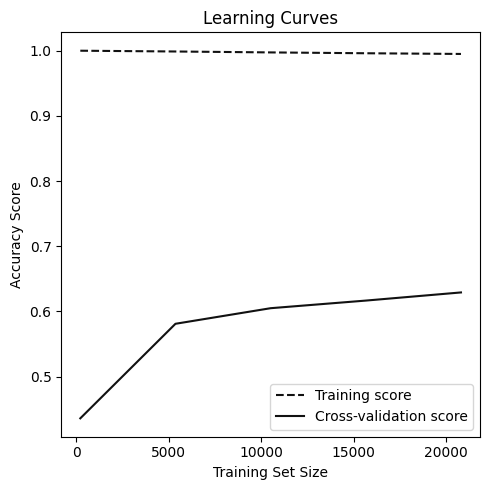

In [186]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

## Evaluate the Models

In [187]:
# Display the scores

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_rf), 6),
                           round(accuracy_score(y_test, y_pred_xgb), 6)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_rf, average="macro"), 6),
                        round(recall_score(y_test, y_pred_xgb, average="macro"), 6)],
              "Precision": [ 
                           round(precision_score(y_test, y_pred_rf, average="macro"), 6),
                           round(precision_score(y_test, y_pred_xgb, average="macro"), 6)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_rf, average="macro"), 6),
                           round(f1_score(y_test, y_pred_xgb, average="macro"), 6)],
             })

,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.634113,0.633947,0.628617,0.630139
1,XGBoost,0.906644,0.906127,0.906865,0.906423


# A - 07 Keep 'key' ; Drop 'mode' ; Drop 'liveness'

We would like to see how the models will perform if only 'key' is kept.

In [188]:
# Store the cleaned dataset into another variable

music_data_7 = music_data.copy()

In [189]:
music_data_7.shape

(32510, 17)

## Remove Irrelevant Features

In [190]:
# Drop the problematic feature: 'id_track'

music_data_7.drop(["id_track"], axis=1, inplace=True)

In [191]:
# Also drop another object type feature: 'playlist_name'

music_data_7.drop(["playlist_name"], axis=1, inplace=True)

Now 'key' and 'liveness' will be dropped.

In [192]:
music_data_7.drop(["mode"], axis=1, inplace=True)

In [193]:
music_data_7.drop(["liveness"], axis=1, inplace=True)

In [194]:
music_data_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32510 non-null  int64  
 1   danceability      32510 non-null  float64
 2   energy            32510 non-null  float64
 3   key               32510 non-null  int64  
 4   loudness          32510 non-null  float64
 5   speechiness       32510 non-null  float64
 6   acousticness      32510 non-null  float64
 7   instrumentalness  32510 non-null  float64
 8   valence           32510 non-null  float64
 9   tempo             32510 non-null  float64
 10  duration_ms       32510 non-null  int64  
 11  playlist_encoded  32510 non-null  int32  
 12  genre_encoded     32510 non-null  int32  
dtypes: float64(8), int32(2), int64(3)
memory usage: 3.2 MB


## Define Features and Target

In [195]:
# Define the target and features

features = music_data_7.drop(["genre_encoded"], axis=1)
target = music_data_7["genre_encoded"]

In [196]:
features.head()

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,playlist_encoded
0,66,0.748,0.916,6,-2.634,0.0583,0.1020,0.000000,0.518,122.036,194754,235
1,67,0.726,0.815,11,-4.969,0.0373,0.0724,0.004210,0.693,99.972,162600,235
2,70,0.675,0.931,1,-3.432,0.0742,0.0794,0.000023,0.613,124.008,176616,235
3,60,0.718,0.930,7,-3.778,0.1020,0.0287,0.000009,0.277,121.956,169093,235
4,69,0.650,0.833,1,-4.672,0.0359,0.0803,0.000000,0.725,123.976,189052,235


In [197]:
features.shape

(32510, 12)

In [198]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [199]:
target.shape

(32510,)

## Split the Dataset

In [200]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)


### The Training Set

In [201]:
# size of the training features

X_train.shape

(26008, 12)

In [202]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [203]:
# size of the testing features

X_test.shape

(6502, 12)

In [204]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [205]:
# Train the model: fit the model to the training set

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [206]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 3, 0, ..., 0, 2, 0], dtype=int64)

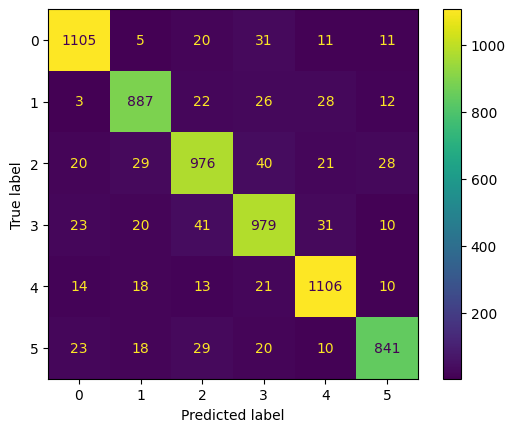

In [207]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

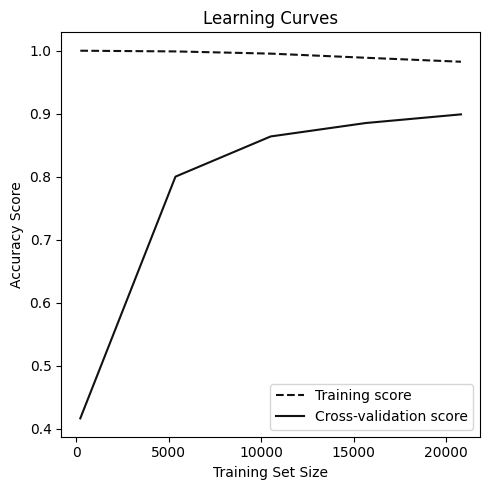

In [208]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

### Random Forest

In [209]:
# Train the model: fit the model to the training set

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [210]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([4, 2, 0, ..., 0, 2, 0])

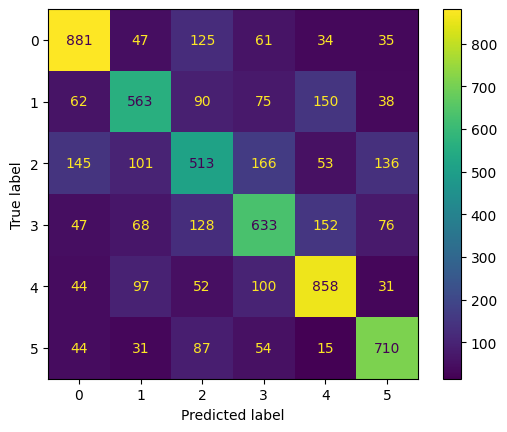

In [211]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

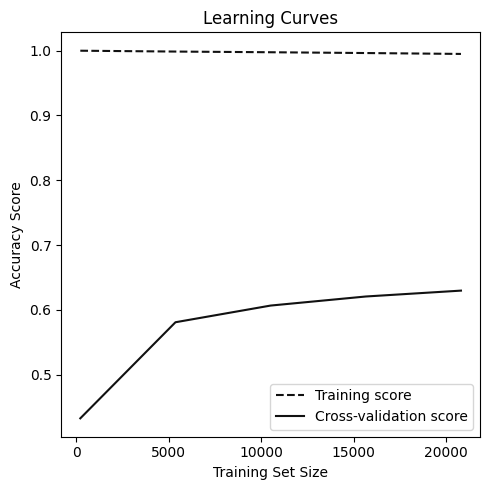

In [212]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

## Evaluate the Models

In [213]:
# Display the scores

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_rf), 6),
                           round(accuracy_score(y_test, y_pred_xgb), 6)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_rf, average="macro"), 6),
                        round(recall_score(y_test, y_pred_xgb, average="macro"), 6)],
              "Precision": [ 
                           round(precision_score(y_test, y_pred_rf, average="macro"), 6),
                           round(precision_score(y_test, y_pred_xgb, average="macro"), 6)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_rf, average="macro"), 6),
                           round(f1_score(y_test, y_pred_xgb, average="macro"), 6)],
             })

,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.639496,0.639110,0.634969,0.636250
1,XGBoost,0.906490,0.905558,0.906568,0.905998


# A - 08 Keep 'key' ; Drop 'mode' ; Keep 'liveness'

We would like to see how the models will perform if only 'mode' is dropped.

In [214]:
# Store the cleaned dataset into another variable

music_data_8 = music_data.copy()

In [215]:
music_data_8.shape

(32510, 17)

## Remove Irrelevant Features

In [216]:
# Drop the problematic feature: 'id_track'

music_data_8.drop(["id_track"], axis=1, inplace=True)

In [217]:
# Also drop another object type feature: 'playlist_name'

music_data_8.drop(["playlist_name"], axis=1, inplace=True)

Now only 'mode' will be dropped.

In [218]:
music_data_8.drop(["mode"], axis=1, inplace=True)

In [219]:
music_data_8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32510 non-null  int64  
 1   danceability      32510 non-null  float64
 2   energy            32510 non-null  float64
 3   key               32510 non-null  int64  
 4   loudness          32510 non-null  float64
 5   speechiness       32510 non-null  float64
 6   acousticness      32510 non-null  float64
 7   instrumentalness  32510 non-null  float64
 8   liveness          32510 non-null  float64
 9   valence           32510 non-null  float64
 10  tempo             32510 non-null  float64
 11  duration_ms       32510 non-null  int64  
 12  playlist_encoded  32510 non-null  int32  
 13  genre_encoded     32510 non-null  int32  
dtypes: float64(9), int32(2), int64(3)
memory usage: 3.5 MB


## Define Features and Target

In [220]:
# Define the target and features

features = music_data_8.drop(["genre_encoded"], axis=1)
target = music_data_8["genre_encoded"]

In [221]:
features.head()

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_encoded
0,66,0.748,0.916,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,235
1,67,0.726,0.815,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,235
2,70,0.675,0.931,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,235
3,60,0.718,0.930,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,235
4,69,0.650,0.833,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,235


In [222]:
features.shape

(32510, 13)

In [223]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [224]:
target.shape

(32510,)

## Split the Dataset

In [225]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)


### The Training Set

In [226]:
# size of the training features

X_train.shape

(26008, 13)

In [227]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [228]:
# size of the testing features

X_test.shape

(6502, 13)

In [229]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [230]:
# Train the model: fit the model to the training set

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [231]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 2, 0, ..., 0, 2, 0], dtype=int64)

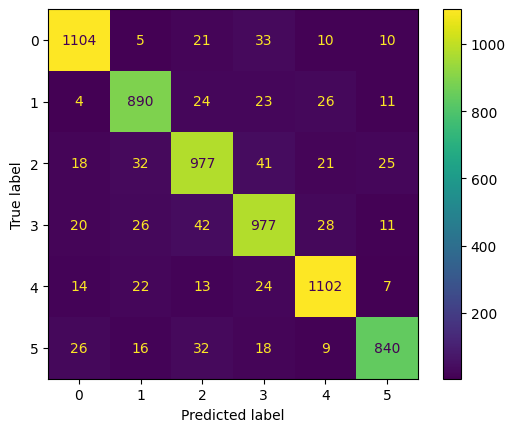

In [232]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

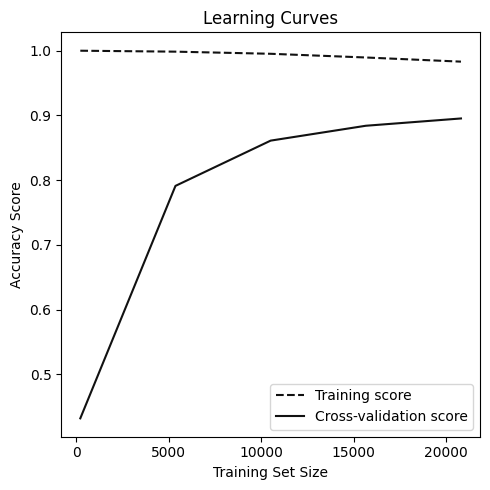

In [233]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

### Random Forest

In [234]:
# Train the model: fit the model to the training set

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [235]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([4, 2, 0, ..., 0, 2, 0])

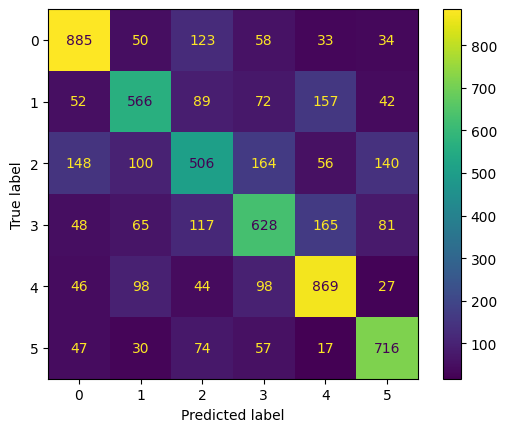

In [236]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

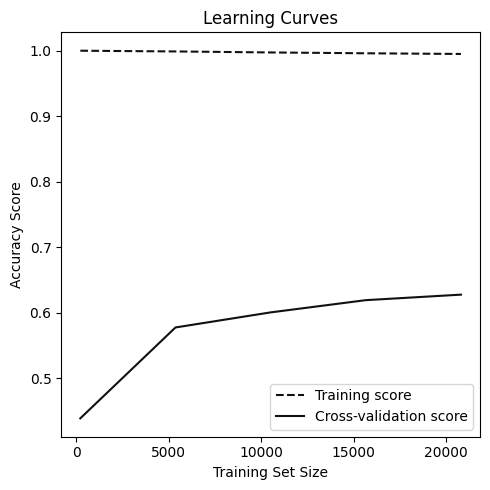

In [237]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

## Evaluate the Models

In [238]:
# Display the scores

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_rf), 6),
                           round(accuracy_score(y_test, y_pred_xgb), 6)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_rf, average="macro"), 6),
                        round(recall_score(y_test, y_pred_xgb, average="macro"), 6)],
              "Precision": [ 
                           round(precision_score(y_test, y_pred_rf, average="macro"), 6),
                           round(precision_score(y_test, y_pred_xgb, average="macro"), 6)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_rf, average="macro"), 6),
                           round(f1_score(y_test, y_pred_xgb, average="macro"), 6)],
             })

,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.641341,0.640996,0.636175,0.637346
1,XGBoost,0.905875,0.905035,0.905995,0.905437


# A - 09 Keep 'key' ; Keep 'mode' ; Drop 'liveness'

We would like to see how the models will perform if only 'liveness' is dropped.

In [239]:
# Store the cleaned dataset into another variable

music_data_9 = music_data.copy()

In [240]:
music_data_9.shape

(32510, 17)

## Remove Irrelevant Features

In [241]:
# Drop the problematic feature: 'id_track'

music_data_9.drop(["id_track"], axis=1, inplace=True)

In [242]:
# Also drop another object type feature: 'playlist_name'

music_data_9.drop(["playlist_name"], axis=1, inplace=True)

Now 'liveness' will be dropped.

In [243]:
music_data_9.drop(["liveness"], axis=1, inplace=True)

In [244]:
music_data_9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32510 non-null  int64  
 1   danceability      32510 non-null  float64
 2   energy            32510 non-null  float64
 3   key               32510 non-null  int64  
 4   loudness          32510 non-null  float64
 5   mode              32510 non-null  int64  
 6   speechiness       32510 non-null  float64
 7   acousticness      32510 non-null  float64
 8   instrumentalness  32510 non-null  float64
 9   valence           32510 non-null  float64
 10  tempo             32510 non-null  float64
 11  duration_ms       32510 non-null  int64  
 12  playlist_encoded  32510 non-null  int32  
 13  genre_encoded     32510 non-null  int32  
dtypes: float64(8), int32(2), int64(4)
memory usage: 3.5 MB


## Define Features and Target

In [245]:
# Define the target and features

features = music_data_9.drop(["genre_encoded"], axis=1)
target = music_data_9["genre_encoded"]

In [246]:
features.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,playlist_encoded
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.518,122.036,194754,235
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.693,99.972,162600,235
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.613,124.008,176616,235
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.277,121.956,169093,235
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.725,123.976,189052,235


In [247]:
features.shape

(32510, 13)

In [248]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [249]:
target.shape

(32510,)

## Split the Dataset

In [250]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)


### The Training Set

In [251]:
# size of the training features

X_train.shape

(26008, 13)

In [252]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [253]:
# size of the testing features

X_test.shape

(6502, 13)

In [254]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [255]:
# Train the model: fit the model to the training set

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [256]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 3, 0, ..., 0, 2, 0], dtype=int64)

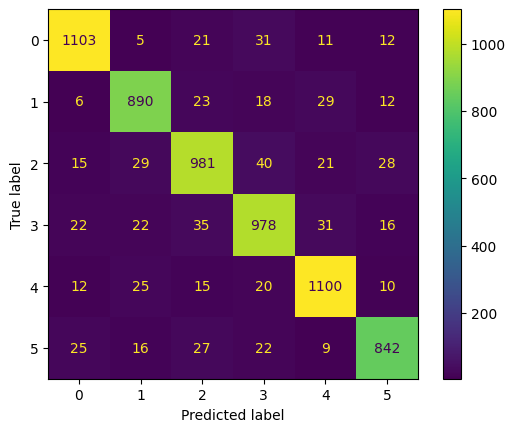

In [257]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

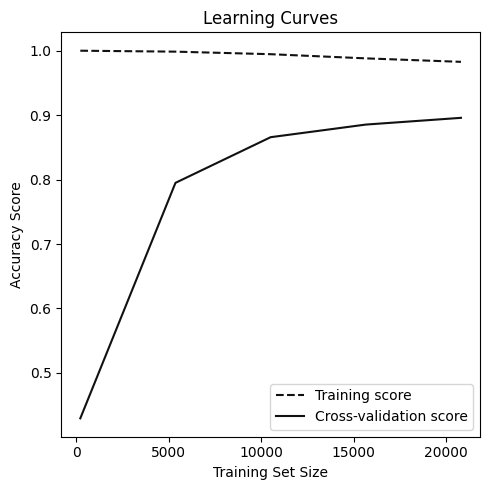

In [258]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

### Random Forest

In [259]:
# Train the model: fit the model to the training set

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [260]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([0, 2, 0, ..., 0, 2, 0])

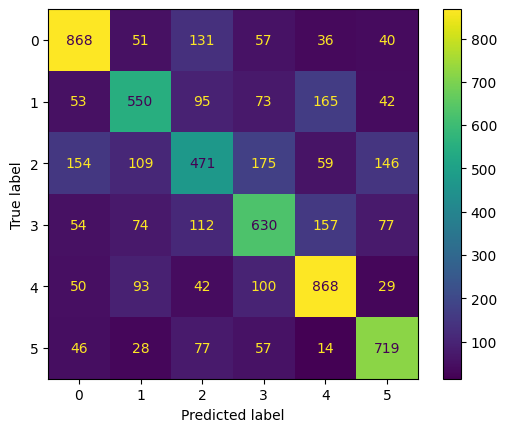

In [261]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

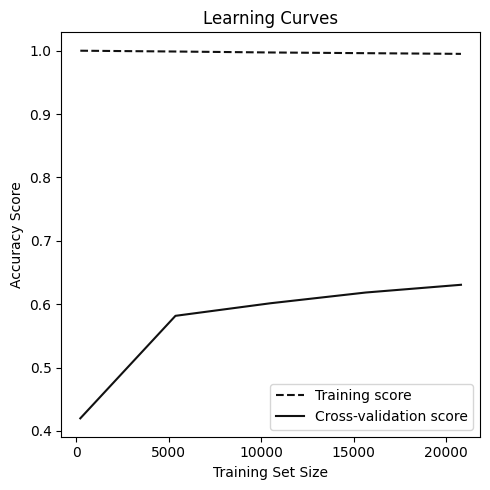

In [262]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

## Evaluate the Models

In [263]:
# Display the scores

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_rf), 6),
                           round(accuracy_score(y_test, y_pred_xgb), 6)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_rf, average="macro"), 6),
                        round(recall_score(y_test, y_pred_xgb, average="macro"), 6)],
              "Precision": [ 
                           round(precision_score(y_test, y_pred_rf, average="macro"), 6),
                           round(precision_score(y_test, y_pred_xgb, average="macro"), 6)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_rf, average="macro"), 6),
                           round(f1_score(y_test, y_pred_xgb, average="macro"), 6)],
             })

,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.631498,0.631330,0.625298,0.626845
1,XGBoost,0.906490,0.905716,0.906216,0.905928


# A - 10 The Model Designed in the First Milestone

For this attempt, we create a model according to the combination of features that we explored and planned in the first milestone. 

In [266]:
# Store the cleaned dataset into another variable

music_data_10 = music_data.copy()

In [267]:
music_data_10.shape

(32510, 17)

## Remove Irrelevant Features

In [268]:
# Drop the problematic feature: 'id_track'

music_data_10.drop(["id_track"], axis=1, inplace=True)

In [269]:
# Also drop another object type feature: 'playlist_name'

music_data_10.drop(["playlist_name"], axis=1, inplace=True)

According to our discussion in the first milestone, we planned to drop theses following features.

In [270]:
music_data_10.drop(["mode"], axis=1, inplace=True)

In [271]:
music_data_10.drop(["key"], axis=1, inplace=True)

In [272]:
music_data_10.drop(["instrumentalness"], axis=1, inplace=True)

In [273]:
music_data_10.drop(["loudness"], axis=1, inplace=True)

In [274]:
music_data_10.drop(["duration_ms"], axis=1, inplace=True)

In [275]:
music_data_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32510 non-null  int64  
 1   danceability      32510 non-null  float64
 2   energy            32510 non-null  float64
 3   speechiness       32510 non-null  float64
 4   acousticness      32510 non-null  float64
 5   liveness          32510 non-null  float64
 6   valence           32510 non-null  float64
 7   tempo             32510 non-null  float64
 8   playlist_encoded  32510 non-null  int32  
 9   genre_encoded     32510 non-null  int32  
dtypes: float64(7), int32(2), int64(1)
memory usage: 2.5 MB


## Define Features and Target

In [276]:
# Define the target and features

features = music_data_10.drop(["genre_encoded"], axis=1)
target = music_data_10["genre_encoded"]

In [277]:
features.head()

,track_popularity,danceability,energy,speechiness,acousticness,liveness,valence,tempo,playlist_encoded
0,66,0.748,0.916,0.0583,0.1020,0.0653,0.518,122.036,235
1,67,0.726,0.815,0.0373,0.0724,0.3570,0.693,99.972,235
2,70,0.675,0.931,0.0742,0.0794,0.1100,0.613,124.008,235
3,60,0.718,0.930,0.1020,0.0287,0.2040,0.277,121.956,235
4,69,0.650,0.833,0.0359,0.0803,0.0833,0.725,123.976,235


In [278]:
features.shape

(32510, 9)

In [279]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [280]:
target.shape

(32510,)

## Split the Dataset

In [281]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)


### The Training Set

In [282]:
# size of the training features

X_train.shape

(26008, 9)

In [283]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [284]:
# size of the testing features

X_test.shape

(6502, 9)

In [285]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [286]:
# Train the model: fit the model to the training set

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [287]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 3, 0, ..., 0, 2, 0], dtype=int64)

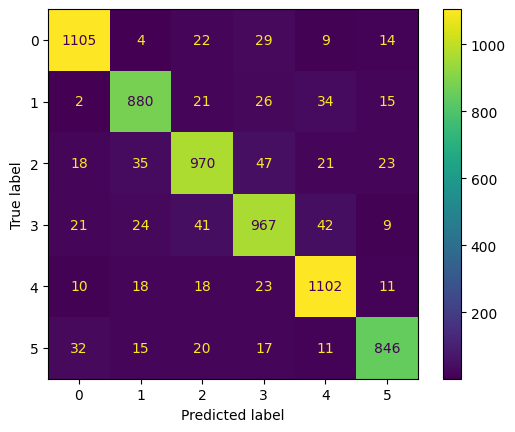

In [288]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

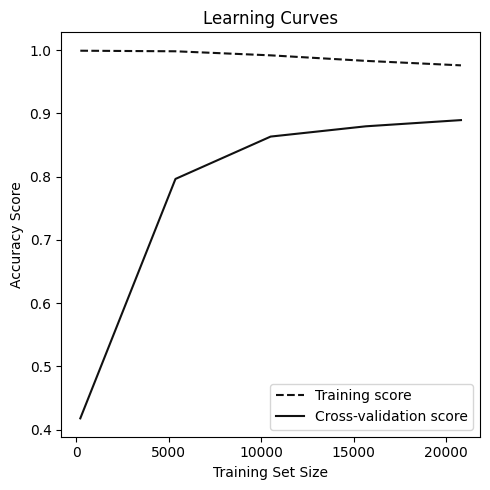

In [289]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

### Random Forest

In [290]:
# Train the model: fit the model to the training set

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [291]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([4, 2, 0, ..., 0, 2, 0])

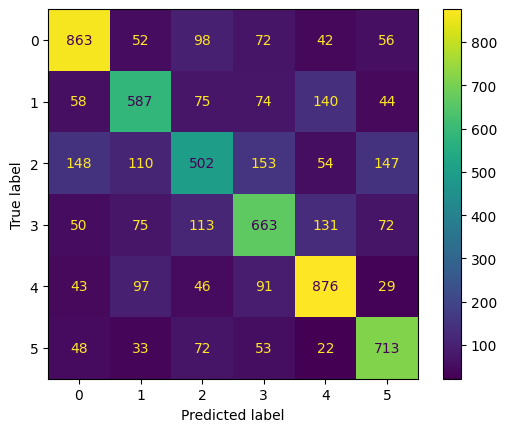

In [292]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

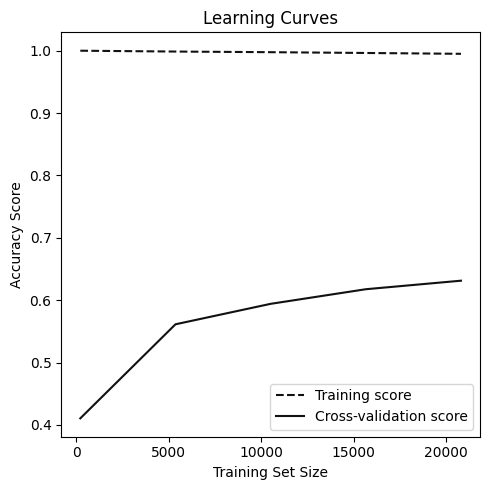

In [293]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

## Evaluate the Models

In [294]:
# Display the scores

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_rf), 6),
                           round(accuracy_score(y_test, y_pred_xgb), 6)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_rf, average="macro"), 6),
                        round(recall_score(y_test, y_pred_xgb, average="macro"), 6)],
              "Precision": [ 
                           round(precision_score(y_test, y_pred_rf, average="macro"), 6),
                           round(precision_score(y_test, y_pred_xgb, average="macro"), 6)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_rf, average="macro"), 6),
                           round(f1_score(y_test, y_pred_xgb, average="macro"), 6)],
             })


,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.646570,0.646616,0.641094,0.642371
1,XGBoost,0.902799,0.901977,0.902933,0.902379


# A - 11 The Least Complex Model 

For this attempt, we continue experimenting with another possible combination of features. We would like to see how the models will perform when they are less complex.

In [295]:
# Store the cleaned dataset into another variable

music_data_11 = music_data.copy()

In [296]:
music_data_11.shape

(32510, 17)

## Remove Irrelevant Features

In [297]:
# Drop the problematic feature: 'id_track'

music_data_11.drop(["id_track"], axis=1, inplace=True)

In [298]:
# Also drop another object type feature: 'playlist_name'

music_data_11.drop(["playlist_name"], axis=1, inplace=True)

According to the feature importance charts in Attempt - 2, we will drop weak features.

In [299]:
music_data_11.drop(["key"], axis=1, inplace=True)

In [300]:
music_data_11.drop(["liveness"], axis=1, inplace=True)

In [301]:
music_data_11.drop(["mode"], axis=1, inplace=True)

In [302]:
music_data_11.drop(["track_popularity"], axis=1, inplace=True)

In [303]:
music_data_11.drop(["acousticness"], axis=1, inplace=True)

In [304]:
music_data_11.drop(["loudness"], axis=1, inplace=True)

In [305]:
music_data_11.drop(["duration_ms"], axis=1, inplace=True)

In [306]:
music_data_11.drop(["valence"], axis=1, inplace=True)

In [307]:
music_data_11.drop(["instrumentalness"], axis=1, inplace=True)

In [308]:
music_data_11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32510 entries, 0 to 32832
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      32510 non-null  float64
 1   energy            32510 non-null  float64
 2   speechiness       32510 non-null  float64
 3   tempo             32510 non-null  float64
 4   playlist_encoded  32510 non-null  int32  
 5   genre_encoded     32510 non-null  int32  
dtypes: float64(4), int32(2)
memory usage: 1.5 MB


## Define Features and Target

In [309]:
# Define the target and features

features = music_data_11.drop(["genre_encoded"], axis=1)
target = music_data_11["genre_encoded"]

In [310]:
features.head()

,danceability,energy,speechiness,tempo,playlist_encoded
0,0.748,0.916,0.0583,122.036,235
1,0.726,0.815,0.0373,99.972,235
2,0.675,0.931,0.0742,124.008,235
3,0.718,0.930,0.1020,121.956,235
4,0.650,0.833,0.0359,123.976,235


In [311]:
features.shape

(32510, 5)

In [312]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre_encoded, dtype: int32

In [313]:
target.shape

(32510,)

## Split the Dataset

In [314]:
# Split the data between train and test sets
# with the test size of 20% and the training set size of 80%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)


### The Training Set

In [315]:
# size of the training features

X_train.shape

(26008, 5)

In [316]:
# size of the training target

y_train.shape

(26008,)

### The Testing Set

In [317]:
# size of the testing features

X_test.shape

(6502, 5)

In [318]:
# size of the testing target

y_test.shape

(6502,)

## Train the Models

### XGBoost

In [319]:
# Train the model: fit the model to the training set

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [320]:
# Predict the labels for the testing set using the trained model
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb

array([4, 3, 0, ..., 0, 2, 0], dtype=int64)

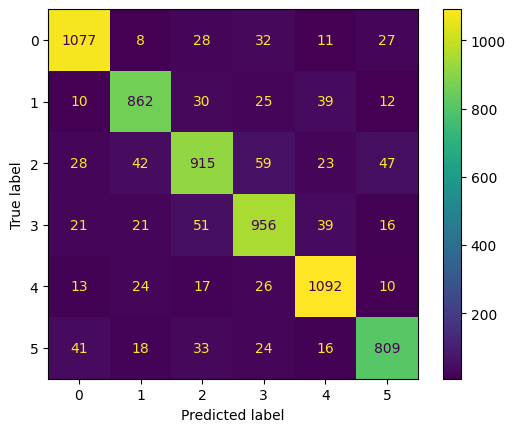

In [321]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

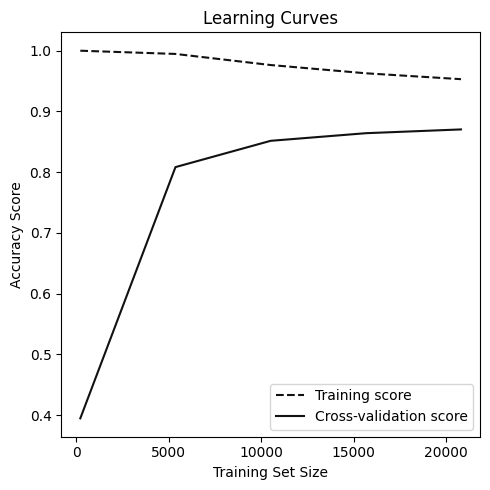

In [322]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

### Random Forest

In [323]:
# Train the model: fit the model to the training set

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [324]:
# Predict the labels for the testing set using the trained model

y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([5, 2, 0, ..., 2, 3, 0])

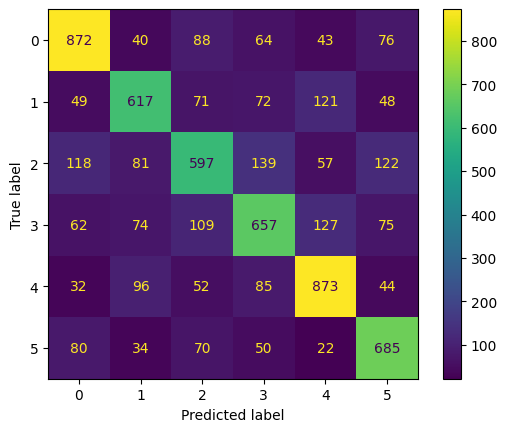

In [325]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

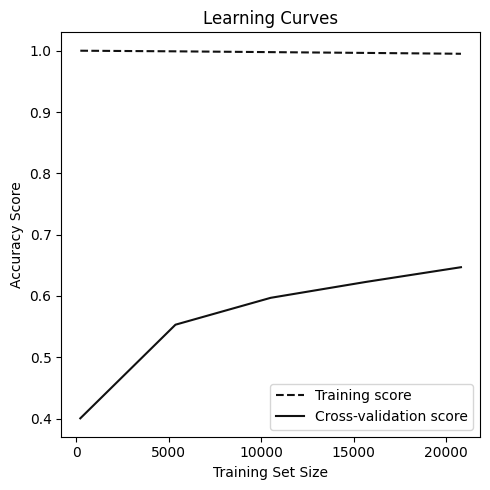

In [326]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

## Evaluate the Models

In [327]:
# Display the scores

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_rf), 6),
                           round(accuracy_score(y_test, y_pred_xgb), 6)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_rf, average="macro"), 6),
                        round(recall_score(y_test, y_pred_xgb, average="macro"), 6)],
              "Precision": [ 
                           round(precision_score(y_test, y_pred_rf, average="macro"), 6),
                           round(precision_score(y_test, y_pred_xgb, average="macro"), 6)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_rf, average="macro"), 6),
                           round(f1_score(y_test, y_pred_xgb, average="macro"), 6)],
             })


,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.661489,0.660922,0.658198,0.658706
1,XGBoost,0.878345,0.877113,0.877771,0.877329


# Results

Of all the attempts we have made, we eventually have developed a machine learning model that can categorize music tracks into genres. Considering and comparing the evaluation metrics (i.e.accuracy score, recall score, precision score, and F1 score) of each trial, **our 4th attempt** yields the most satisfying score in each measurement. **This model we have created is the combination of these following 12 features: ['track_popularity'], ['danceability'], ['energy'], ['loudness'], ['speechiness'], ['acousticness'], ['instrumentalness'], ['liveness'], ['valence'], ['tempo'], ['duration_ms'], and ['playlist_encoded'].** We are hopeful that the model we have trained can classify future audio tracks into genres correctly.

We have determined that the model for predicting the music genres should be based on **the XGboost classifier algorithm.** This task of categorizing the music data into genres (i.e. 'pop', 'rap', 'rock', 'latin', 'r&b', and 'edm') is a supervised learning task, meaning that we have the model learn and predict the music genres from the data that are already categorized. Since the labels we want our machine to predict contain multiple discrete classes, we have decided to implement classification models. Among many available options of classifier, we want to test and compare the performance of these decision-tree-based algorithms: random forest and XGBoost. The decision tree was not selected since it is not robust to a feature having many classes. After training the models of these two algorithms, considering their scores in the evaluation matrices, the models based on XGBoost perform significantly better than those of random forest. Therefore, we have decided to use the XGBoost algorithm to do this task.

**This 4th model has relatively impressive scores, about 0.91 in every metric.**  Accuracy Score: 0.9107, Recall Score: 0.9099, Precision Score: 0.9106, F1 Score: 0.9102. There is the trade-off issue between the precision and recall score. The precision score is higher than the recall score. This means that our model tends to minimize the number of false-positive errors (e.g. an audio track is predicted to be of a genre, but the track actually does not belong to that genre). This might be a good case for us since it would be better for us to not have many cases of music tracks being incorrectly grouped into genres they do not actually belong to.  

Now we will examine the strength of the features of our model. According to the feature importance chart of the XGboost model, **the feature ['playlist_encoded'] or playlist id is the strongest predictive feature.** This implies that music tracks of the same genre share the same or similar playlist id. **Other prominent features are ['tempo'], ['speechiness'], ['danceability'], and ['energy'] respectively.** These four features are also crucial to the random forest models as well. This information indicates that these features are indicative properties of each music genre.

An interesting case happens in the weakest features. For both XGBoost and random forest models, ['key'], ['liveness'] and ['mode'] are the weakest features. However, by inspecting the combinations of features in Attempt 2 to 7, we have found that removing ['key'] and ['mode'] and keeping ['liveness'] increases the performance of the model, as shown in Attempt 7. As a result, we conclude that **['key'] and ['mode'] are the weakest predictive features.** They do not crucially contribute to the performance of the model. Also, having them as features of the model decreases the scores and thus can be dropped. In addition, we also have learned to **be careful to not have data index as a feature** since it can terribly undermine the learning process of the model, as resulted and shown in the first attempt. 

Our model arguably can predict all the genres. **Rap and edm are the genres this model is best at predicting.** As we have explored the relationships between genres and features in the first milestone, we have found that these two genres have distinctive features. Rap is the most speechy. Edm is the most instrumental and least acoustic and has the rapidest tempo. Additionally, our model, to some degree, can also predict pop and r&b. R&b has the lowest energy as its feature, but it is perhaps not distinctive enough. Rock and latin are the genres the model struggles the most to predict. Interestingly, **rock is the genre our model is worst at predicting** despite that it is the least danceable genre.

Although our model can do the task relatively well, there is still room for improvement. For now, the model is not sufficiently good at predicting the genres that do not have many distinctive features (i.e. rock, latin, pop, and r&b). To make the classifier model better, **we suggest that we should add new features specific to each genre.** Moreover, our model is trained by using about 32,000 samples, which is a relatively very small size of dataset. Thus, **we are not confident how well the model will perform if it has to handle the larger size of data.**

# Acknowledgement

- Goodness of Fit Test: code generated by ChatGPT using this prompt: "In a column of a dataset, how could I know if categories of that column are significantly different in their frequencies"
- Thanks to https://www.w3schools.com/python/pandas/ref_df_drop_duplicates.asp that we have to specify the parameter 'inplace' as true to drop the duplicates in the current dataframe
- Thanks to https://saturncloud.io/blog/how-to-properly-copy-a-pandas-dataframe-into-another-variable-a-comprehensive-guide/ and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html for giving us the correct way to make a copy of a dataframe
- Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- We greatly benefit from the discussions in these forums and want thank them for their insights: https://stackoverflow.com/questions/36981050/learning-curves-why-does-the-training-accuracy-start-so-high-then-suddenly-dr and https://stats.stackexchange.com/questions/210407/learning-curves-why-does-the-training-accuracy-start-so-high-then-suddenly-dr
- We thank https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case and https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html for reminding that we have to specify parameter 'average' as 'macro' (calculating the score globally) since we have results with multiple classess
- We thank Sarah Huq for her codes and fuctions, feature_importance_plot and learning_curve_plot